In [36]:
import pandas as pd
import numpy as np

In [37]:
df = pd.read_excel('1553768847_housing.xlsx')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


# EDA

In [38]:
x = df.drop(columns=['median_house_value'])
y = df.median_house_value

# Handle missing values

Fill the missing values with the mean of the respective column.

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [40]:
df.shape

(20640, 10)

In [41]:
x.total_bedrooms = np.where(np.isnan(x.total_bedrooms), x.total_bedrooms.mean(), x.total_bedrooms)

In [42]:
x.total_bedrooms.isnull().sum()

0

In [43]:
y.isnull().sum()

0

# Encode categorical data 

Convert categorical column in the dataset to numerical data.

In [44]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x['encoded_ocean_proximity'] = le.fit_transform(x['ocean_proximity'])

In [45]:
x.drop(columns=['ocean_proximity'], inplace=True)

In [46]:
x.encoded_ocean_proximity.unique()

array([3, 0, 1, 4, 2])

# Split the dataset :Split the data into 80% training dataset and 20% test dataset.

In [47]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Standardize data 

Standardize training and test datasets.

In [48]:
#Standardize training and test datasets.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Linear Regression 

Perform Linear Regression on training data.
Predict output for test dataset using the fitted model.
Print root mean squared error (RMSE) from Linear Regression.
            [ HINT: Import mean_squared_error from sklearn.metrics ]

In [49]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

model = LinearRegression()

pipe = make_pipeline(scaler, model)

In [50]:
pipe.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [51]:
y_pred = pipe.predict(x_test)

In [52]:
from sklearn.metrics import mean_squared_error

# Calculate the RMSE of the predictions
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print the RMSE
print("Root Mean Squared Error: {:.2f}".format(rmse))


Root Mean Squared Error: 69615.43


# Decision Tree Regression

Perform Decision Tree Regression on training data.
Predict output for test dataset using the fitted model.
Print root mean squared error from Decision Tree Regression.


In [53]:
#Perform Decision Tree Regression :
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

model = DecisionTreeRegressor()

pipe = make_pipeline(scaler, model)

pipe.fit(x_train, y_train)

y_pred = pipe.predict(x_test)

# Calculate the RMSE of the predictions
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print the RMSE
print("Root Mean Squared Error: {:.2f}".format(rmse))

Root Mean Squared Error: 66144.36


# Random Forest Regression

Perform Random Forest Regression on training data.
Predict output for test dataset using the fitted model.
Print RMSE (root mean squared error) from Random Forest Regression.

In [54]:
#Perform Random Forest Regression :
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

model = RandomForestRegressor()

pipe = make_pipeline(scaler, model)

pipe.fit(x_train, y_train)

y_pred = pipe.predict(x_test)

# Calculate the RMSE of the predictions
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print the RMSE
print("Root Mean Squared Error: {:.2f}".format(rmse))

Root Mean Squared Error: 47009.12


# Perform Linear Regression with one independent variable :


Extract just the median_income column from the independent variables (from X_train and X_test).
Perform Linear Regression to predict housing values based on median_income.
Predict output for test dataset using the fitted model.
Plot the fitted model for training data as well as for test data to check if the fitted model satisfies the test data.

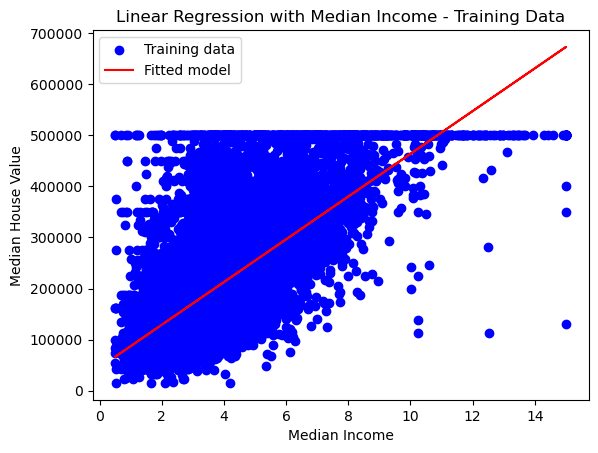

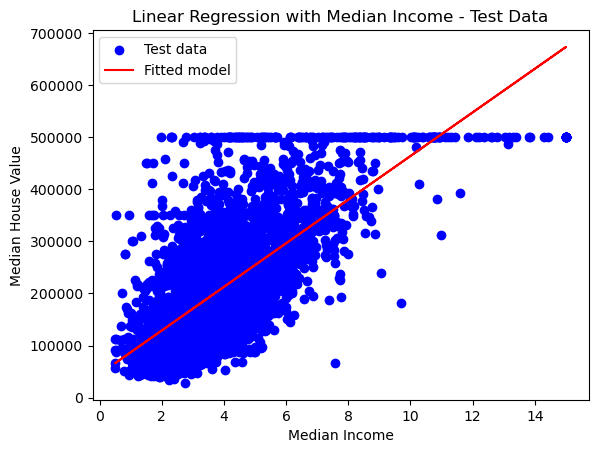

In [56]:
import matplotlib.pyplot as plt
x_train_income = x_train[['median_income']]
x_test_income = x_test[['median_income']]

linear_model_income = LinearRegression()
linear_model_income.fit(x_train_income, y_train)

plt.scatter(x_train_income, y_train, color='blue', label='Training data')
plt.plot(x_train_income, linear_model_income.predict(x_train_income), color='red', label='Fitted model')
plt.title('Linear Regression with Median Income - Training Data')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.legend()
plt.show()

plt.scatter(x_test_income, y_test, color='blue', label='Test data')
plt.plot(x_test_income, linear_model_income.predict(x_test_income), color='red', label='Fitted model')
plt.title('Linear Regression with Median Income - Test Data')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.legend()
plt.show()

# OVERVIEW PROJECT 

The California Housing Price Prediction project aimed to develop a model to predict the median house value in California using the provided dataset. Key steps included data preprocessing, feature engineering, model training, and evaluation. The analysis involved three regression techniques: Linear Regression, Decision Tree Regression, and Random Forest Regression.

Results showed that the Random Forest Regression model outperformed the other models, yielding the lowest Root Mean Squared Error (RMSE) of 47,009.12. This indicates its superior predictive accuracy in estimating median housing prices.

In addition, a bonus exercise was conducted to perform Linear Regression with a single independent variable (median income). The fitted model demonstrated a clear linear relationship between median income and median house value, further highlighting the importance of median income in predicting housing prices.
Overall, the developed models provide valuable insights for real estate professionals, investors, and policymakers navigating the California housing market, aiding in informed decision-making processes
